<a href="https://colab.research.google.com/github/RCK04/football-players-stats-24-25-season/blob/main/football_players_stats_24_25_season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the libraries
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import kagglehub;

In [2]:
# Download latest version of the dataset
path = kagglehub.dataset_download("hubertsidorowicz/football-players-stats-2024-2025");

data = pd.read_csv(path + "/players_data_light-2024_2025.csv");
print(data.head());

100%|██████████| 1.17M/1.17M [00:00<00:00, 1.64MB/s]

Extracting files...
   Rk             Player   Nation    Pos        Squad                Comp  \
0   1         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League   
1   2         Max Aarons  eng ENG  DF,MF     Valencia          es La Liga   
2   3     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga   
3   4     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A   
4   5  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1   

    Age    Born  MP  Starts  ...  Att (GK)  Thr  Launch%  AvgLen  Opp  Stp  \
0  24.0  2000.0   3       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
1  24.0  2000.0   4       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
2  21.0  2003.0   1       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
3  20.0  2004.0   6       0  ...       NaN  NaN      NaN     NaN  NaN  NaN   
4  18.0  2006.0   1       0  ...       NaN  NaN      NaN     NaN  NaN  NaN   

   Stp%  #OPA  #OPA/90  AvgDist  
0   NaN   NaN 

In [3]:
data.describe();

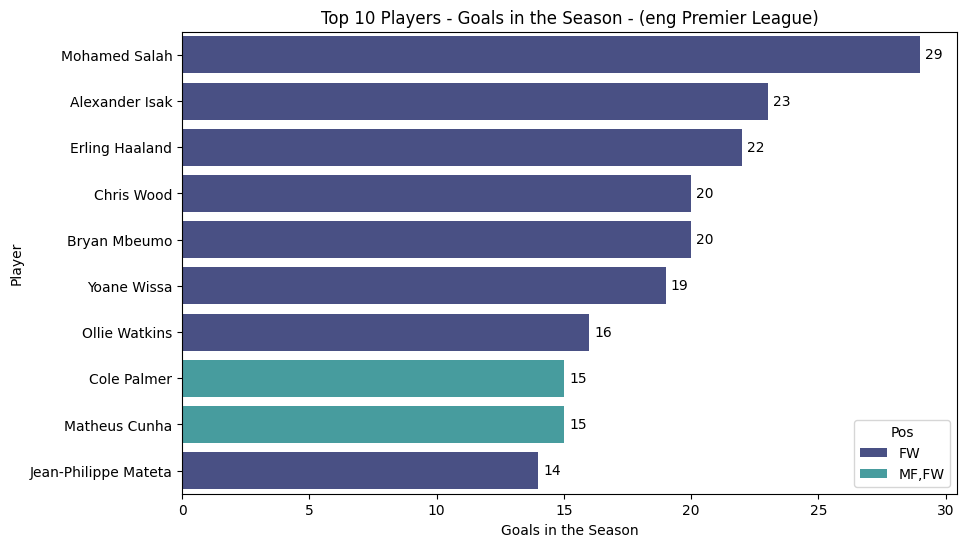

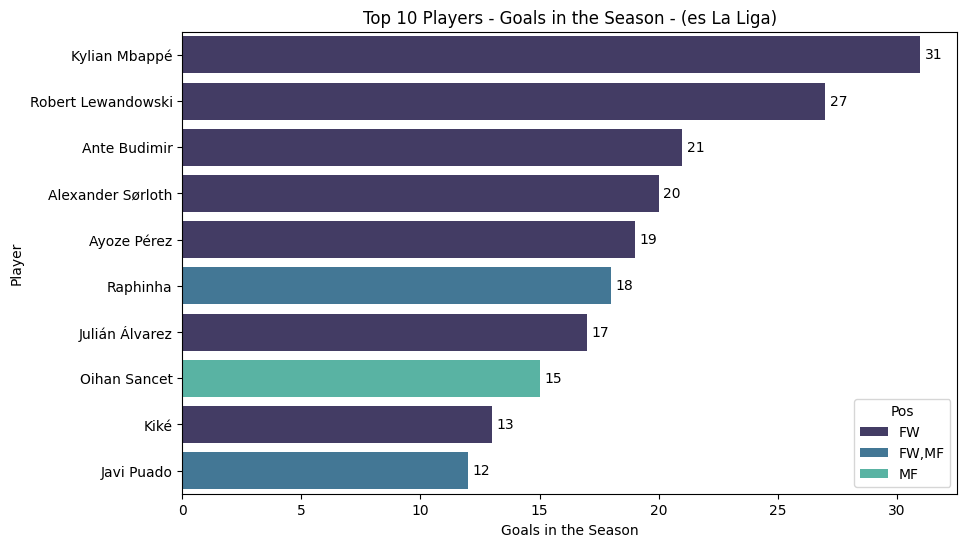

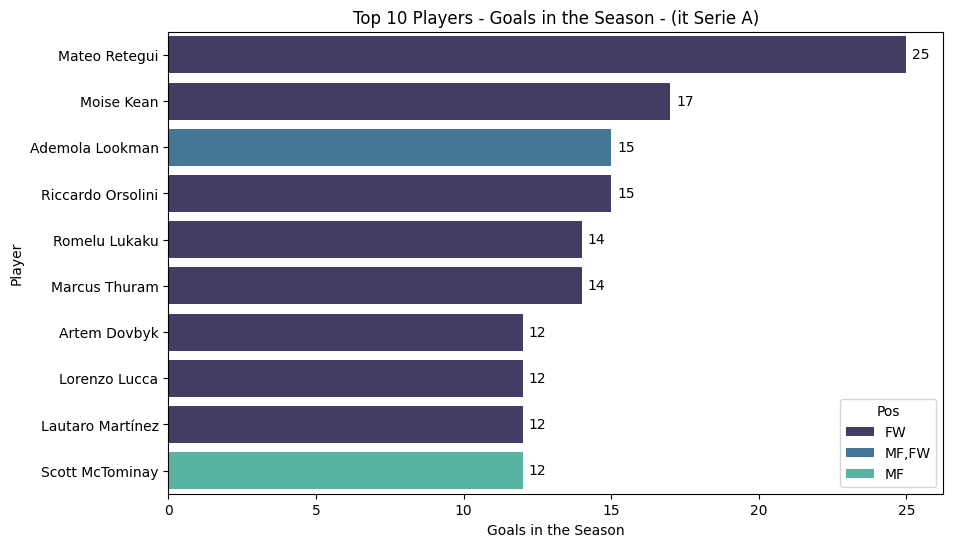

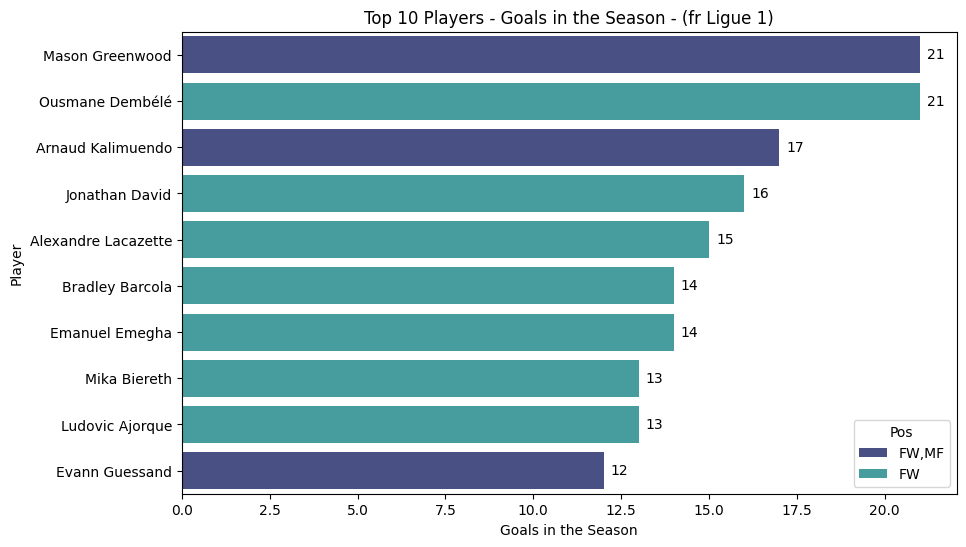

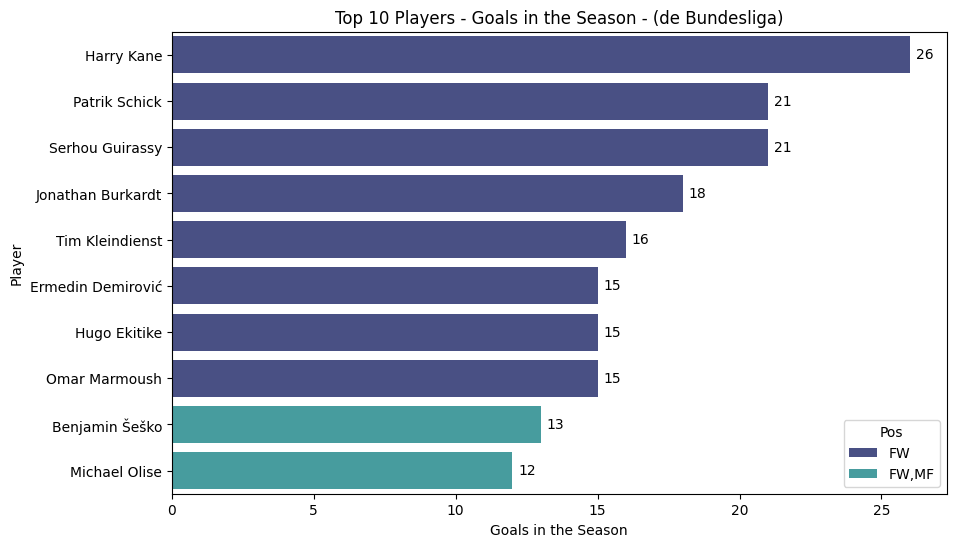

In [12]:
leagues_data = data['Comp'].unique();
for league in leagues_data:
  top10_scorers = data[data['Comp'] == league].sort_values('Gls', ascending=False).head(10);

  # Plot
  plt.figure(figsize=(10,6));
  ax = sns.barplot(
      x='Gls',
      y='Player',
      data=top10_scorers,
      hue='Pos',
      palette='mako',
  );

  for i, v in enumerate(top10_scorers['Gls']):
    ax.text(v + 0.2, i, str(v), color='black', va='center', fontsize=10);

  plt.title(f"Top 10 Players - Goals in the Season - ({league})");
  plt.xlabel("Goals in the Season");
  plt.ylabel("Player");
  plt.show();

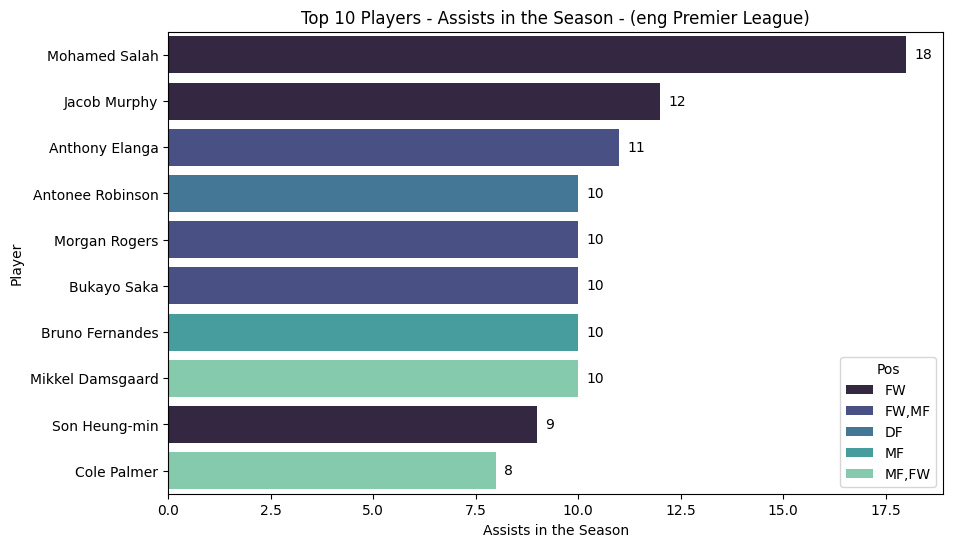

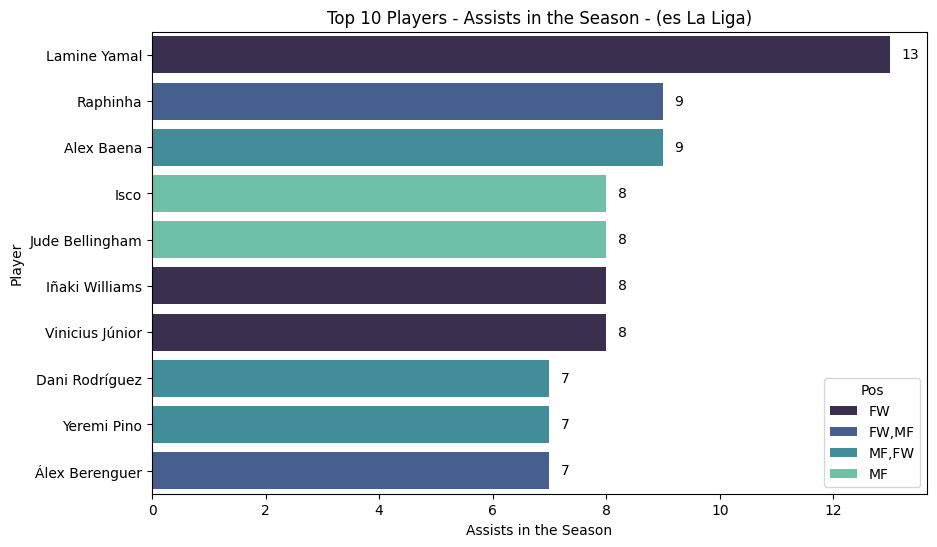

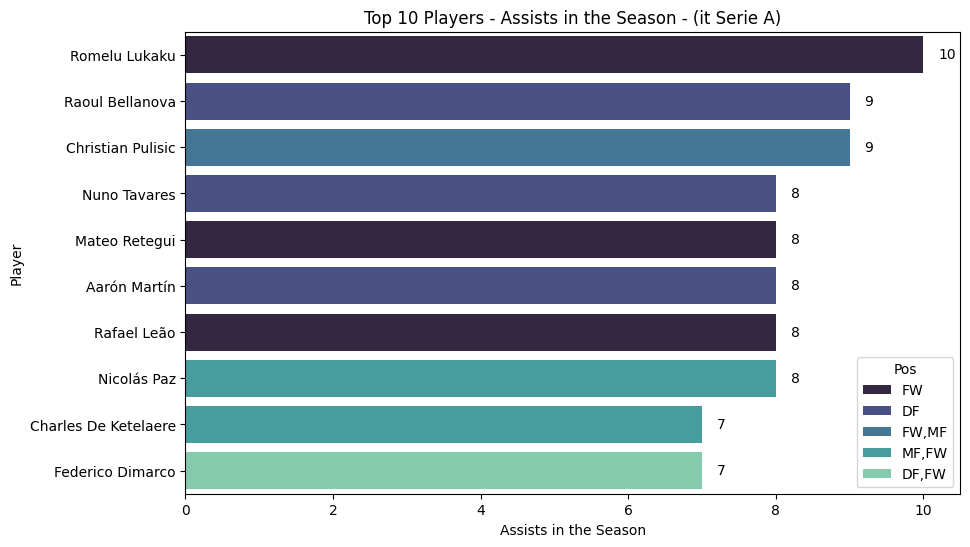

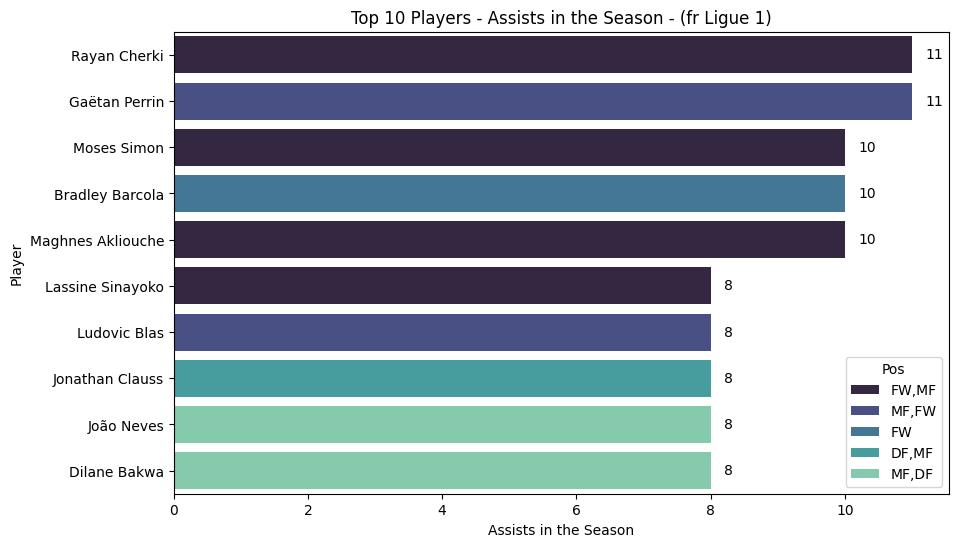

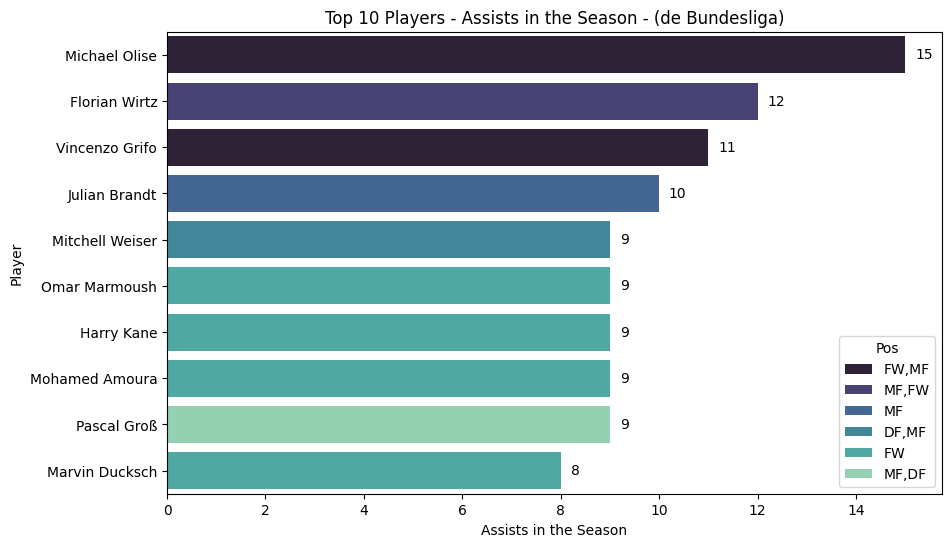

In [13]:
leagues_data = data['Comp'].unique();
for league in leagues_data:
  top10_assists = data[data['Comp'] == league].sort_values('Ast', ascending=False).head(10);

  # Plot
  plt.figure(figsize=(10,6));
  ax = sns.barplot(
      x='Ast',
      y='Player',
      data=top10_assists,
      hue='Pos',
      palette='mako',
  );

  for i, v in enumerate(top10_assists['Ast']):
    ax.text(v + 0.2, i, str(v), color='black', va='center', fontsize=10);

  plt.title(f"Top 10 Players - Assists in the Season - ({league})");
  plt.xlabel("Assists in the Season");
  plt.ylabel("Player");
  plt.show();

In [6]:
# Create 2 news columns

data['MinsPerMatch'] = np.where(
    data['MP'] > 0,
    data['Min'] / data['MP'],
    0
    );

data['GoalsPerMatch'] = np.where(
    data['MP'] > 0,
    data['Gls'] / data['MP'],
    0
    );

print(data.head());

   Rk             Player   Nation    Pos        Squad                Comp  \
0   1         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League   
1   2         Max Aarons  eng ENG  DF,MF     Valencia          es La Liga   
2   3     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga   
3   4     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A   
4   5  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1   

    Age    Born  MP  Starts  ...  Launch%  AvgLen  Opp  Stp  Stp%  #OPA  \
0  24.0  2000.0   3       1  ...      NaN     NaN  NaN  NaN   NaN   NaN   
1  24.0  2000.0   4       1  ...      NaN     NaN  NaN  NaN   NaN   NaN   
2  21.0  2003.0   1       1  ...      NaN     NaN  NaN  NaN   NaN   NaN   
3  20.0  2004.0   6       0  ...      NaN     NaN  NaN  NaN   NaN   NaN   
4  18.0  2006.0   1       0  ...      NaN     NaN  NaN  NaN   NaN   NaN   

   #OPA/90  AvgDist  MinsPerMatch  GoalsPerMatch  
0      NaN      NaN     28.666667  